In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import folium
import webbrowser
from folium.plugins import HeatMap

In [9]:
housedata=pd.read_csv("/Users/taraapple/Desktop/kc_house_data.csv")
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
housedata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

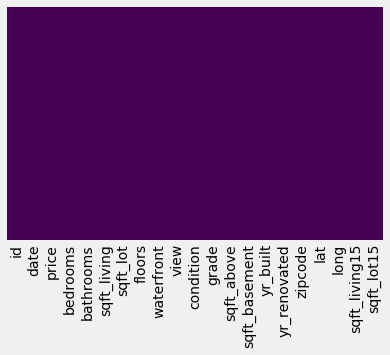

In [12]:
sns.heatmap(housedata.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [13]:
housedata.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


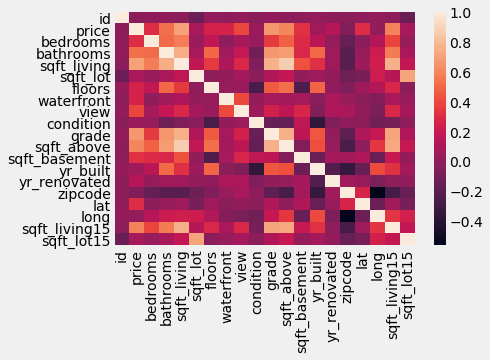

In [14]:
sns.heatmap(housedata.corr(),cmap='rocket',cbar=True,yticklabels=True)

In [15]:
housedata.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

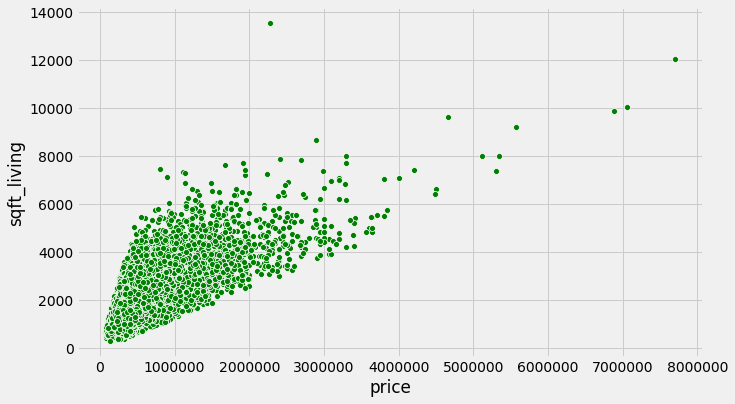

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="sqft_living",data=housedata,color="g",palette='viridis')

Text(0.5, 1.0, 'distribution of sqft_living')

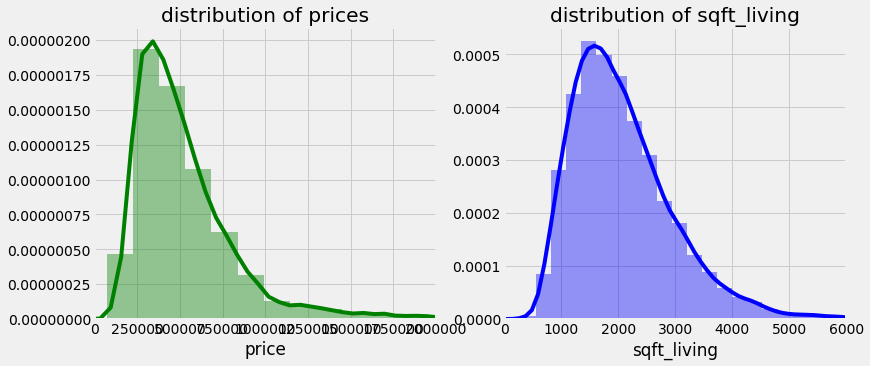

In [17]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.distplot(housedata['price'],color='g')
plt.ylim(0,None)
plt.xlim(0,2000000)
axis.set_title('distribution of prices')

axis=fig.add_subplot(122)
sns.distplot(housedata['sqft_living'],color='b')
plt.ylim(0,None)
plt.xlim(0,6000)
axis.set_title('distribution of sqft_living')

Text(0.5, 1.0, 'sqft_living vs price')

<Figure size 720x432 with 0 Axes>

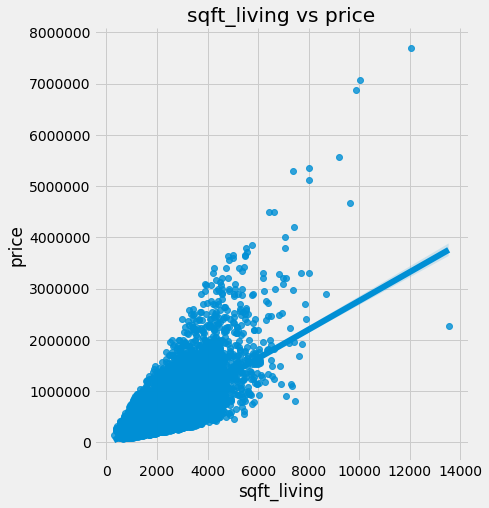

In [19]:
plt.figure(figsize=(10,6))
sns.lmplot(x='sqft_living',y='price',palette='viridis',height=7,data=housedata)
plt.title('sqft_living vs price')

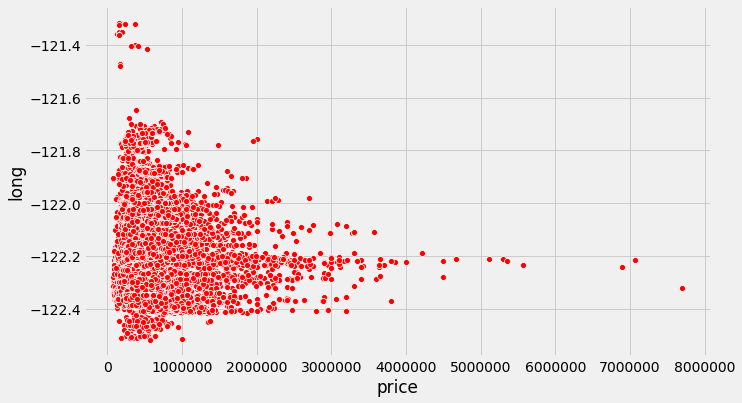

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="long",data=housedata,color="r")

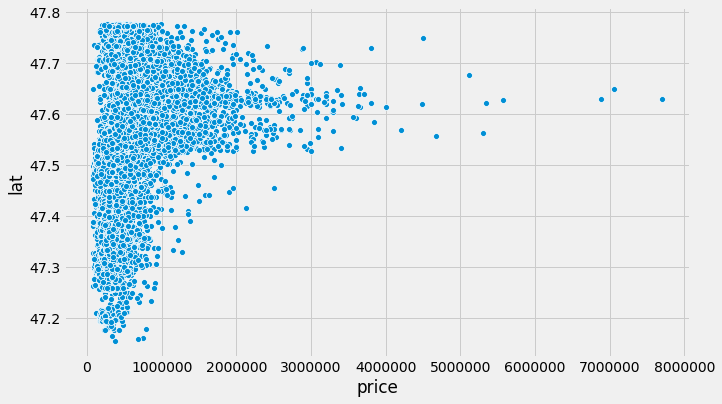

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="lat",data=housedata)

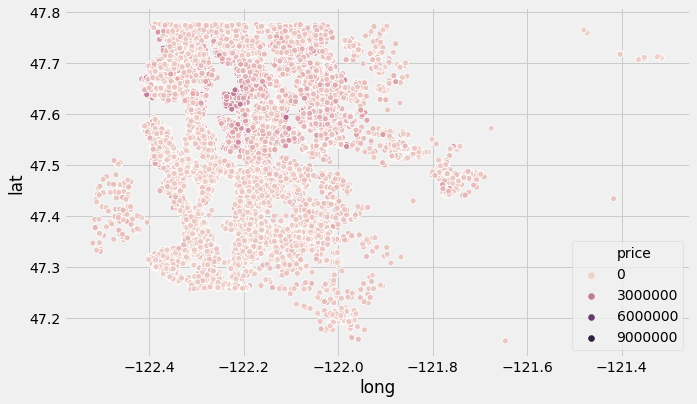

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=housedata,hue="price")

In [27]:
new_data=housedata.sort_values("price",ascending=False).iloc[200:]
#we are removing outliers

In [31]:
housedata.drop(['id','zipcode'],axis=1,inplace=True)

In [32]:
housedata["date"].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [33]:
housedata["date"]=pd.to_datetime(housedata["date"])
housedata["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [34]:
housedata["year"]=housedata["date"].apply(lambda date: date.year)
housedata["month"]=housedata["date"].apply(lambda date: date.month)

In [35]:
housedata.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


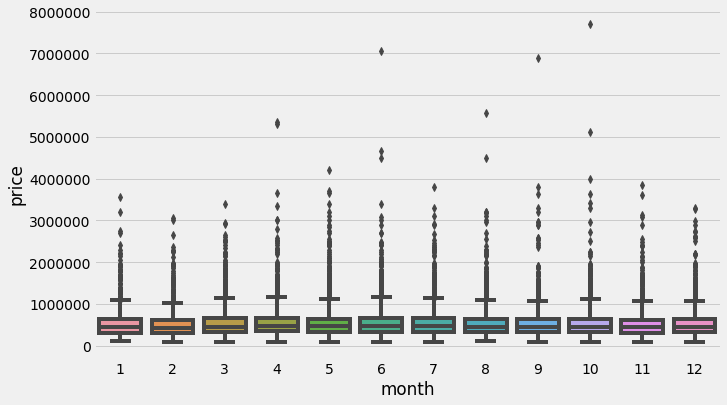

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x="month",y="price",data=housedata)

In [37]:
housedata.groupby("month").mean()["price"]

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

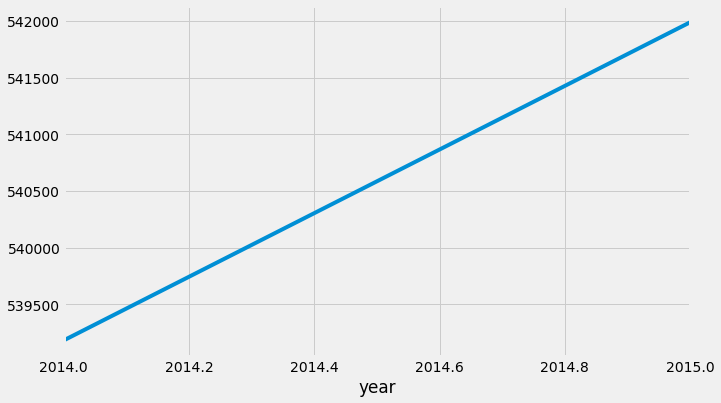

In [39]:
plt.figure(figsize=(10,6))
housedata.groupby("year").mean()["price"].plot()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
x=housedata.drop(["price","date"],axis=1).values
y=housedata["price"].values

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [43]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [44]:
model=Sequential()


RELU :- Stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.

Equation :- A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise.

In [45]:
def model_creating():
    model=Sequential()
    model.add(Dense(19,activation="relu"))
    model.add(Dense(19,activation="relu"))
    model.add(Dense(19,activation="relu"))
    model.add(Dense(19,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss="mse")
    return model

In [46]:
model=model_creating()

In [47]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         batch_size=130,epochs=550,verbose=1)

Train on 16209 samples, validate on 5404 samples
Epoch 1/550
16209/16209 [==============================] - 1s 58us/sample - loss: 431327461777.2862 - val_loss: 411594514074.2443
Epoch 2/550
16209/16209 [==============================] - 0s 18us/sample - loss: 427957588626.7866 - val_loss: 400171764247.1177
Epoch 3/550
16209/16209 [==============================] - 0s 18us/sample - loss: 382221546191.9398 - val_loss: 302416969194.3982
Epoch 4/550
16209/16209 [==============================] - 0s 18us/sample - loss: 220382067572.5733 - val_loss: 119391936551.4138
Epoch 5/550
16209/16209 [==============================] - 0s 18us/sample - loss: 93997563844.8684 - val_loss: 73506093475.9082
Epoch 6/550
16209/16209 [==============================] - 0s 18us/sample - loss: 69737063306.9371 - val_loss: 61836427297.3501
Epoch 7/550
16209/16209 [==============================] - 0s 18us/sample - loss: 60998023311.4068 - val_loss: 56020695509.9334
Epoch 8/550
16209/16209 [======================

16209/16209 [==============================] - 0s 18us/sample - loss: 30149956314.8059 - val_loss: 27890569588.1569
Epoch 128/550
16209/16209 [==============================] - 0s 18us/sample - loss: 30185860879.3041 - val_loss: 28002750317.3353
Epoch 129/550
16209/16209 [==============================] - 0s 18us/sample - loss: 30078410520.5276 - val_loss: 27821544448.0000
Epoch 130/550
16209/16209 [==============================] - 0s 19us/sample - loss: 30082210415.9141 - val_loss: 27813370013.2761
Epoch 131/550
16209/16209 [==============================] - 0s 19us/sample - loss: 30027155735.8643 - val_loss: 28020669379.3634
Epoch 132/550
16209/16209 [==============================] - 0s 18us/sample - loss: 29988502381.0555 - val_loss: 27775107997.8446
Epoch 133/550
16209/16209 [==============================] - 0s 18us/sample - loss: 29982258224.5814 - val_loss: 27808359403.5352
Epoch 134/550
16209/16209 [==============================] - 0s 18us/sample - loss: 29908628838.6432 - v

16209/16209 [==============================] - 0s 19us/sample - loss: 27610295740.9400 - val_loss: 26379914080.0711
Epoch 254/550
16209/16209 [==============================] - 0s 18us/sample - loss: 27528635807.3742 - val_loss: 26462279584.4974
Epoch 255/550
16209/16209 [==============================] - 0s 19us/sample - loss: 27583252874.3370 - val_loss: 26395334533.5899
Epoch 256/550
16209/16209 [==============================] - 0s 18us/sample - loss: 27519161380.9572 - val_loss: 26588714039.7098
Epoch 257/550
16209/16209 [==============================] - 0s 19us/sample - loss: 27567824103.1565 - val_loss: 26386089175.6388
Epoch 258/550
16209/16209 [==============================] - 0s 19us/sample - loss: 27515792491.3971 - val_loss: 26459215343.7039
Epoch 259/550
16209/16209 [==============================] - 0s 18us/sample - loss: 27509210418.7136 - val_loss: 26341259857.1014
Epoch 260/550
16209/16209 [==============================] - 0s 18us/sample - loss: 27488716284.8728 - v

Epoch 379/550
16209/16209 [==============================] - 0s 19us/sample - loss: 26435928037.4666 - val_loss: 26358599633.0067
Epoch 380/550
16209/16209 [==============================] - 0s 20us/sample - loss: 26445516990.9142 - val_loss: 26276203110.7032
Epoch 381/550
16209/16209 [==============================] - 0s 19us/sample - loss: 26425828530.5951 - val_loss: 26264124128.7343
Epoch 382/550
16209/16209 [==============================] - 0s 19us/sample - loss: 26400945342.8510 - val_loss: 26250021950.5315
Epoch 383/550
16209/16209 [==============================] - 0s 18us/sample - loss: 26389702067.0847 - val_loss: 26370674825.5692
Epoch 384/550
16209/16209 [==============================] - 0s 18us/sample - loss: 26365064917.6887 - val_loss: 26237692153.3679
Epoch 385/550
16209/16209 [==============================] - 0s 18us/sample - loss: 26410637357.4227 - val_loss: 26239855430.3005
Epoch 386/550
16209/16209 [==============================] - 0s 21us/sample - loss: 263776

16209/16209 [==============================] - 0s 19us/sample - loss: 25892770599.2473 - val_loss: 26122825766.6558
Epoch 443/550
16209/16209 [==============================] - 0s 19us/sample - loss: 25878567553.3504 - val_loss: 26284786163.8727
Epoch 444/550
16209/16209 [==============================] - 0s 19us/sample - loss: 25918553875.3473 - val_loss: 26149418963.2805
Epoch 445/550
16209/16209 [==============================] - 0s 20us/sample - loss: 25889705585.3671 - val_loss: 26149180124.9445
Epoch 446/550
16209/16209 [==============================] - 0s 20us/sample - loss: 25893696327.9719 - val_loss: 26131354798.3301
Epoch 447/550
16209/16209 [==============================] - 0s 19us/sample - loss: 25899375892.7687 - val_loss: 26246776641.7528
Epoch 448/550
16209/16209 [==============================] - 0s 19us/sample - loss: 25876014815.7967 - val_loss: 26197898939.2154
Epoch 449/550
16209/16209 [==============================] - 0s 18us/sample - loss: 25829176449.1924 - v

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  380       
_________________________________________________________________
dense_1 (Dense)              multiple                  380       
_________________________________________________________________
dense_2 (Dense)              multiple                  380       
_________________________________________________________________
dense_3 (Dense)              multiple                  380       
_________________________________________________________________
dense_4 (Dense)              multiple                  20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [50]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,4.313275e+11,4.115945e+11
1,4.279576e+11,4.001718e+11
2,3.822215e+11,3.024170e+11
3,2.203821e+11,1.193919e+11
4,9.399756e+10,7.350609e+10


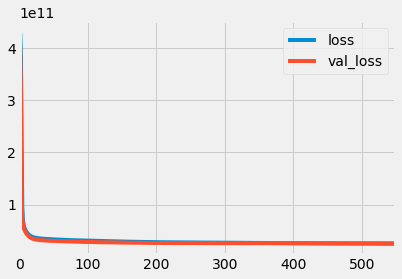

In [51]:
loss.plot()

# Second Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('/Users/taraapple/Desktop/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


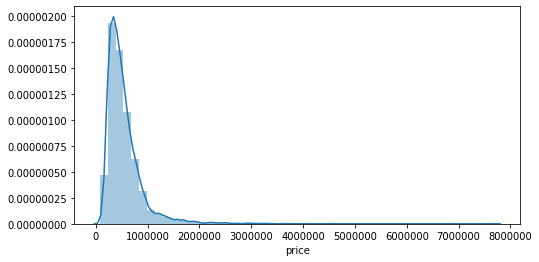

In [6]:
plt.figure(figsize=(8,4))
sns.distplot(df['price'])


In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


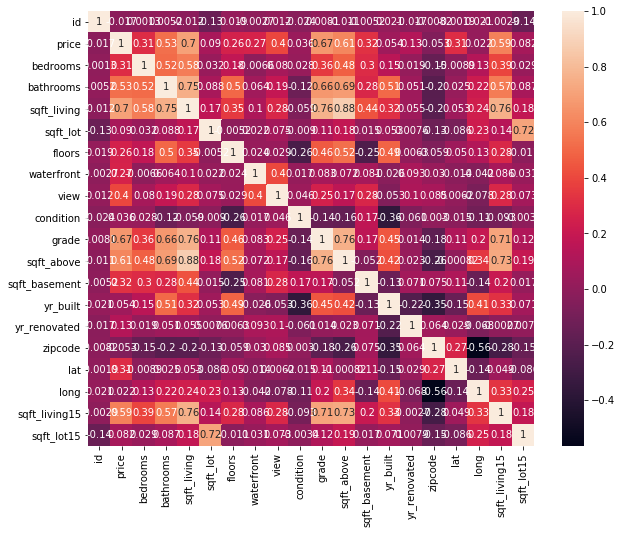

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [9]:
df.dropna(inplace=True)

In [13]:
x=df.drop(["price","date"],axis=1).values
y=df["price"].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [20]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         batch_size=130,epochs=550,verbose=1)

Epoch 1/550
125/125 [==============================] - 0s 2ms/step - loss: 431362375680.0000 - val_loss: 411797127168.0000
Epoch 2/550
125/125 [==============================] - 0s 783us/step - loss: 431359033344.0000 - val_loss: 411792146432.0000
Epoch 3/550
125/125 [==============================] - 0s 752us/step - loss: 431350972416.0000 - val_loss: 411780448256.0000
Epoch 4/550
125/125 [==============================] - 0s 758us/step - loss: 431333769216.0000 - val_loss: 411755249664.0000
Epoch 5/550
125/125 [==============================] - 0s 732us/step - loss: 431296053248.0000 - val_loss: 411706032128.0000
Epoch 6/550
125/125 [==============================] - 0s 754us/step - loss: 431235956736.0000 - val_loss: 411629813760.0000
Epoch 7/550
125/125 [==============================] - 0s 770us/step - loss: 431137193984.0000 - val_loss: 411518599168.0000
Epoch 8/550
125/125 [==============================] - 0s 769us/step - loss: 431004155904.0000 - val_loss: 411369472000.0000
Ep

125/125 [==============================] - 0s 754us/step - loss: 337037590528.0000 - val_loss: 313827065856.0000
Epoch 67/550
125/125 [==============================] - 0s 740us/step - loss: 335830646784.0000 - val_loss: 310684123136.0000
Epoch 68/550
125/125 [==============================] - 0s 730us/step - loss: 335159492608.0000 - val_loss: 307544653824.0000
Epoch 69/550
125/125 [==============================] - 0s 739us/step - loss: 331873124352.0000 - val_loss: 304409477120.0000
Epoch 70/550
125/125 [==============================] - 0s 720us/step - loss: 329126150144.0000 - val_loss: 301243760640.0000
Epoch 71/550
125/125 [==============================] - 0s 750us/step - loss: 324484071424.0000 - val_loss: 298002743296.0000
Epoch 72/550
125/125 [==============================] - 0s 752us/step - loss: 325102469120.0000 - val_loss: 294812483584.0000
Epoch 73/550
125/125 [==============================] - 0s 732us/step - loss: 320631668736.0000 - val_loss: 291581198336.0000
Epoch

Epoch 131/550
125/125 [==============================] - 0s 744us/step - loss: 239744876544.0000 - val_loss: 152510676992.0000
Epoch 132/550
125/125 [==============================] - 0s 750us/step - loss: 236904841216.0000 - val_loss: 151578230784.0000
Epoch 133/550
125/125 [==============================] - 0s 746us/step - loss: 240277323776.0000 - val_loss: 151016833024.0000
Epoch 134/550
125/125 [==============================] - 0s 731us/step - loss: 237349994496.0000 - val_loss: 150493282304.0000
Epoch 135/550
125/125 [==============================] - 0s 777us/step - loss: 244591296512.0000 - val_loss: 149966012416.0000
Epoch 136/550
125/125 [==============================] - 0s 748us/step - loss: 239585247232.0000 - val_loss: 149374058496.0000
Epoch 137/550
125/125 [==============================] - 0s 774us/step - loss: 237658128384.0000 - val_loss: 148731346944.0000
Epoch 138/550
125/125 [==============================] - 0s 770us/step - loss: 239000485888.0000 - val_loss: 14

125/125 [==============================] - 0s 756us/step - loss: 223022235648.0000 - val_loss: 132076797952.0000
Epoch 196/550
125/125 [==============================] - 0s 748us/step - loss: 222547378176.0000 - val_loss: 131753984000.0000
Epoch 197/550
125/125 [==============================] - 0s 748us/step - loss: 233413869568.0000 - val_loss: 131812179968.0000
Epoch 198/550
125/125 [==============================] - 0s 756us/step - loss: 228973101056.0000 - val_loss: 131735789568.0000
Epoch 199/550
125/125 [==============================] - 0s 730us/step - loss: 229531762688.0000 - val_loss: 131697967104.0000
Epoch 200/550
125/125 [==============================] - 0s 737us/step - loss: 229976473600.0000 - val_loss: 131308044288.0000
Epoch 201/550
125/125 [==============================] - 0s 734us/step - loss: 220284059648.0000 - val_loss: 131004088320.0000
Epoch 202/550
125/125 [==============================] - 0s 735us/step - loss: 232377925632.0000 - val_loss: 130883444736.000

125/125 [==============================] - 0s 762us/step - loss: 220073803776.0000 - val_loss: 123808899072.0000
Epoch 260/550
125/125 [==============================] - 0s 759us/step - loss: 225648181248.0000 - val_loss: 123564818432.0000
Epoch 261/550
125/125 [==============================] - 0s 754us/step - loss: 224853835776.0000 - val_loss: 123543633920.0000
Epoch 262/550
125/125 [==============================] - 0s 751us/step - loss: 220467822592.0000 - val_loss: 123444854784.0000
Epoch 263/550
125/125 [==============================] - 0s 755us/step - loss: 224233537536.0000 - val_loss: 123327864832.0000
Epoch 264/550
125/125 [==============================] - 0s 763us/step - loss: 229119066112.0000 - val_loss: 123488665600.0000
Epoch 265/550
125/125 [==============================] - 0s 757us/step - loss: 232279474176.0000 - val_loss: 123629805568.0000
Epoch 266/550
125/125 [==============================] - 0s 763us/step - loss: 224904544256.0000 - val_loss: 123681202176.000

125/125 [==============================] - 0s 747us/step - loss: 220818751488.0000 - val_loss: 118245384192.0000
Epoch 324/550
125/125 [==============================] - 0s 750us/step - loss: 222494769152.0000 - val_loss: 118231875584.0000
Epoch 325/550
125/125 [==============================] - 0s 714us/step - loss: 220846686208.0000 - val_loss: 118341083136.0000
Epoch 326/550
125/125 [==============================] - 0s 720us/step - loss: 221600464896.0000 - val_loss: 118122455040.0000
Epoch 327/550
125/125 [==============================] - 0s 703us/step - loss: 213913780224.0000 - val_loss: 117881462784.0000
Epoch 328/550
125/125 [==============================] - 0s 748us/step - loss: 220405481472.0000 - val_loss: 117838323712.0000
Epoch 329/550
125/125 [==============================] - 0s 743us/step - loss: 212526727168.0000 - val_loss: 117672312832.0000
Epoch 330/550
125/125 [==============================] - 0s 789us/step - loss: 222080450560.0000 - val_loss: 117389344768.000

125/125 [==============================] - 0s 743us/step - loss: 216366874624.0000 - val_loss: 111288139776.0000
Epoch 388/550
125/125 [==============================] - 0s 767us/step - loss: 214988374016.0000 - val_loss: 111046688768.0000
Epoch 389/550
125/125 [==============================] - 0s 736us/step - loss: 215950016512.0000 - val_loss: 111313379328.0000
Epoch 390/550
125/125 [==============================] - 0s 743us/step - loss: 217228378112.0000 - val_loss: 111502360576.0000
Epoch 391/550
125/125 [==============================] - 0s 765us/step - loss: 217093308416.0000 - val_loss: 111576653824.0000
Epoch 392/550
125/125 [==============================] - 0s 760us/step - loss: 214673080320.0000 - val_loss: 111561195520.0000
Epoch 393/550
125/125 [==============================] - 0s 782us/step - loss: 214742204416.0000 - val_loss: 111741452288.0000
Epoch 394/550
125/125 [==============================] - 0s 731us/step - loss: 213166702592.0000 - val_loss: 112125124608.000

125/125 [==============================] - 0s 750us/step - loss: 210348883968.0000 - val_loss: 107273666560.0000
Epoch 452/550
125/125 [==============================] - 0s 727us/step - loss: 213232320512.0000 - val_loss: 107160018944.0000
Epoch 453/550
125/125 [==============================] - 0s 722us/step - loss: 210650365952.0000 - val_loss: 106966851584.0000
Epoch 454/550
125/125 [==============================] - 0s 721us/step - loss: 210803490816.0000 - val_loss: 107125669888.0000
Epoch 455/550
125/125 [==============================] - 0s 718us/step - loss: 209056415744.0000 - val_loss: 107010064384.0000
Epoch 456/550
125/125 [==============================] - 0s 733us/step - loss: 213498200064.0000 - val_loss: 106952105984.0000
Epoch 457/550
125/125 [==============================] - 0s 732us/step - loss: 206030946304.0000 - val_loss: 106588823552.0000
Epoch 458/550
125/125 [==============================] - 0s 740us/step - loss: 207122268160.0000 - val_loss: 106313179136.000

125/125 [==============================] - 0s 747us/step - loss: 204034146304.0000 - val_loss: 102778134528.0000
Epoch 516/550
125/125 [==============================] - 0s 735us/step - loss: 205597294592.0000 - val_loss: 102575972352.0000
Epoch 517/550
125/125 [==============================] - 0s 764us/step - loss: 202053369856.0000 - val_loss: 102358016000.0000
Epoch 518/550
125/125 [==============================] - 0s 823us/step - loss: 206303232000.0000 - val_loss: 102498156544.0000
Epoch 519/550
125/125 [==============================] - 0s 722us/step - loss: 207314386944.0000 - val_loss: 102211977216.0000
Epoch 520/550
125/125 [==============================] - 0s 700us/step - loss: 210060361728.0000 - val_loss: 102294388736.0000
Epoch 521/550
125/125 [==============================] - 0s 702us/step - loss: 206473936896.0000 - val_loss: 102143729664.0000
Epoch 522/550
125/125 [==============================] - 0s 729us/step - loss: 211960004608.0000 - val_loss: 102235176960.000

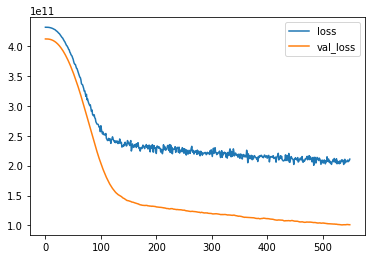

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot()